In [35]:
%matplotlib inline
import pandas as pd

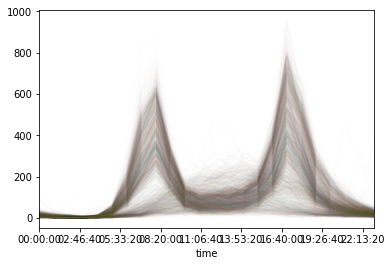

In [2]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01) #we now have a line for each day

In [13]:
X = pivoted.fillna(0).T.values
X.shape
#24 hours per 1631 days - T transposes 

(1641, 24)

In [20]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [21]:
X2.shape

(1641, 2)

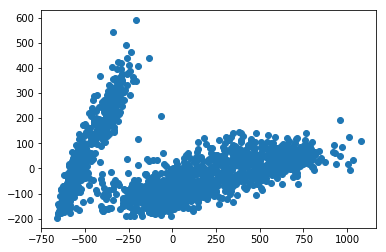

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1]) 
#This shows there are two types of days (clustered)

In [23]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)

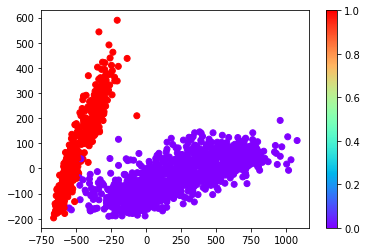

In [26]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

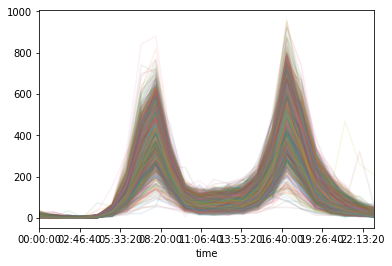

In [30]:
# Show cluster 0
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1);

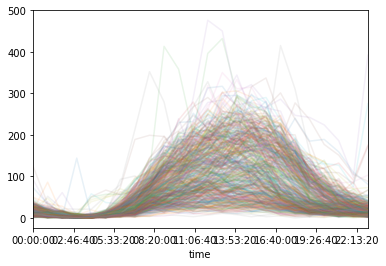

In [31]:
# Show cluster 1
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1);

In [38]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

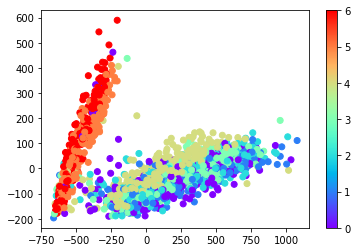

In [41]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

In [44]:
#Non weekends but in the "holidays" (non commute) cluster
dates  = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06'],
              dtype='datetime64[ns]', freq=None)